# Gráficos de Payoff de Opciones

Este script en Python muestra una función para visualizar gráficos de payoff de opciones financieras, tanto de compra ("call") como de venta ("put").

## Funcionalidad

La función `generate_payoff` toma varios parámetros para personalizar el gráfico de payoff:

- `st`: El precio máximo del activo subyacente.
- `k`: El precio de ejercicio de la opción.
- `maximum_`: Indica si se debe graficar la posición larga (True) o no (False).
- `minimum_`: Indica si se debe graficar la posición corta (True) o no (False).
- `option_type`: Tipo de opción, ya sea "call" o "put".


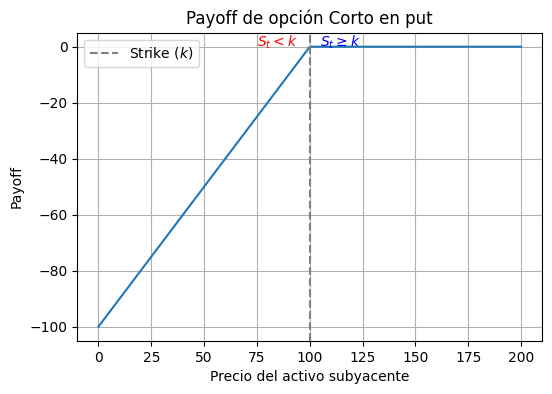

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_payoff(ST, P, k, option_type="call"):
    f = plt.figure(figsize = (6,4))
    plt.plot(ST, P)
    plt.title(f'Payoff de opción {option_type}')
    plt.xlabel('Precio del activo subyacente')
    plt.ylabel('Payoff')
    text_y = max(P) * 0.7
    plt.axvline(x=k, color='gray', linestyle='--', label=r'Strike ($k$)')
    plt.text(k + 5,text_y, r'$S_t \geq k$', fontsize=10, color='blue')
    plt.text(k - 25, text_y, r'$S_t < k$', fontsize=10, color='red')
    plt.legend()
    plt.grid(True)
    plt.show()

def generate_payoff(st, k, maximum_=True, minimum_=True, option_type="call"):
    ST = np.linspace(0, st, st + 1)

    if option_type == "call":
        P = np.maximum(ST - k, 0)
    elif option_type == "put":
        P = np.maximum(k - ST, 0)

    if maximum_:
        plot_payoff(ST, P, k, f'Largo en {option_type}')
    elif minimum_:
        Pm = -P
        plot_payoff(ST, Pm, k, f'Corto en {option_type}')

generate_payoff(200, 100, maximum_=False, minimum_=True, option_type="put")

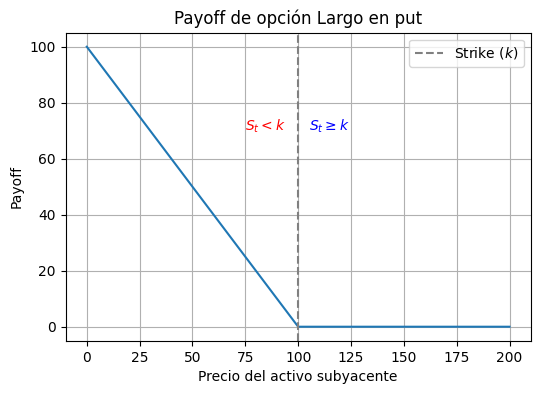

In [2]:
generate_payoff(200, 100, maximum_=True, minimum_=False, option_type="put")

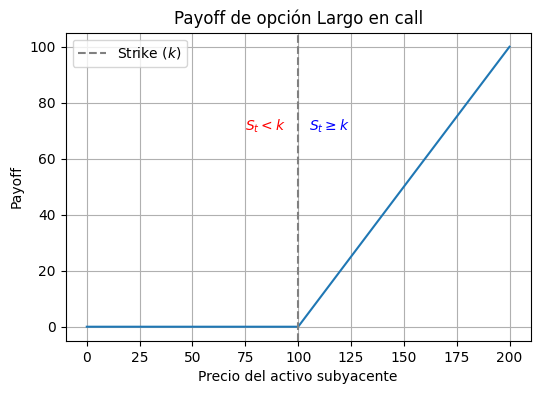

In [3]:
generate_payoff(200, 100, maximum_=True, minimum_=False, option_type="call")

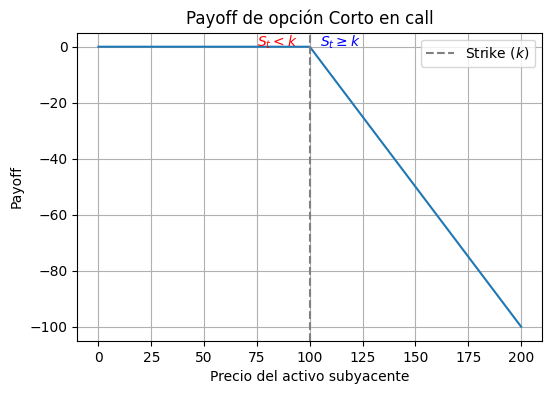

In [4]:
generate_payoff(200, 100, maximum_=False, minimum_=True, option_type="call")